In [1]:
#!pip install hplc-py

In [2]:
# Support for math
import numpy as np

# Plotting tools
from matplotlib import pyplot as plt
import matplotlib as mplt

import warnings
warnings.filterwarnings('ignore')

#Data frames tools
import pandas as pd
import os

from scipy.signal import find_peaks

from hplc.quant import Chromatogram

In [3]:
#df_summary = pd.read_excel("/Users/clarat/Documents/Sun Lab/PNNL/2002 Design Summary Sheet.xlsx")
df_summary = pd.read_excel("/Users/clarat/Documents/Sun Lab/PNNL/208590_ESMI Synthesis EXPERIMENT LOG6a37cb242d3e0142ead426d85c590b82b20ece59623cbc8e445d91ce28a08e63.xlsx",sheet_name='2006')
df_summary.head()

,Design ID,Library ID,Vial ID,Reagent Ratio\n(mg/mL reagent/sulfonating agent),Sulfonating Agent\n(wt%),Temperature (degC),Sample Time (min),Model Design ID
0,2006,102119,1,84,89,45,49,2
1,2006,102119,2,84,89,45,49,2
2,2006,102119,3,84,89,45,49,2
3,2006,102119,4,97,95,95,87,8
4,2006,102119,5,97,95,95,87,8


In [4]:
import fnmatch
import re

# get the CSV files only
# Get the CSV files only
#files = fnmatch.filter(os.listdir('/Users/clarat/Documents/Sun Lab/PNNL/102107 UV Spectra'), '*.csv')
files = fnmatch.filter(os.listdir('/Users/clarat/Documents/Sun Lab/PNNL/102119 HPLC Data'), '*.csv')

# Sort files based on the second number in the filename
sorted_files = sorted(files, key=lambda s: int(re.findall(r'\d+', s)[1]) if len(re.findall(r'\d+', s)) >= 2 else 0)

print(sorted_files)



['102119 (1).csv', '102119 (2).csv', '102119 (3).csv', '102119 (4).csv', '102119 (5).csv', '102119 (6).csv', '102119 (7).csv', '102119 (8).csv', '102119 (9).csv', '102119 (10).csv', '102119 (11).csv', '102119 (12).csv', '102119 (13).csv', '102119 (14).csv', '102119 (15).csv', '102119 (16).csv', '102119 (17).csv', '102119 (18).csv', '102119 (19).csv', '102119 (20).csv', '102119 (21).csv', '102119 (22).csv', '102119 (23).csv', '102119 (24).csv', '102119 (25).csv', '102119 (26).csv', '102119 (27).csv', '102119 (28).csv', '102119 (29).csv', '102119 (30).csv', '102119 (31).csv', '102119 (32).csv', '102119 (33).csv', '102119 (34).csv', '102119 (35).csv', '102119 (36).csv', '102119 (37).csv', '102119 (38).csv', '102119 (39).csv', '102119 (40).csv', '102119 (41).csv', '102119 (42).csv', '102119 (43).csv', '102119 (44).csv', '102119 (45).csv', '102119 (46).csv', '102119 (47).csv', '102119 (48).csv']


In [5]:
#read them into pandas
columns_list = [pd.read_csv('/Users/clarat/Documents/Sun Lab/PNNL/102119 HPLC Data/'+files,skiprows=1, sep='\t').columns.item() for files in sorted_files]

df_list = [pd.read_csv('/Users/clarat/Documents/Sun Lab/PNNL/102119 HPLC Data/'+ sorted_files[i],skiprows=2, sep='\t',names=['X%s'%columns_list[i],'Y%s'%columns_list[i]]).dropna(axis=1, how='all') for i in range(len(sorted_files))]
# df_columns = [df_list[i].columns.item() for i in range(len(df_list))]

#df_list = [df_list[i].rename(columns={"ACQUITY TUV ChA": "X%s"%sorted_files[i], "ACQUITY TUV ChA 280nm": "Y%s"%sorted_files[i]}) for i in range(len(df_list))]
# 

# df_list
len(df_list),#df_list

(48,)

In [6]:
big_df = pd.concat(df_list,axis=1)
big_df.head()


,X102119_01,Y102119_01,X102119_02,Y102119_02,X102119_03,Y102119_03,X102119_04,Y102119_04,X102119_05,Y102119_05,...,X102119_44,Y102119_44,X102119_45,Y102119_45,X102119_46,Y102119_46,X102119_47,Y102119_47,X102119_48,Y102119_48
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.016667,0.0,0.016667,0.0,0.016667,0.0,0.016667,0.0,0.016667,0.0,...,0.016667,0.0,0.016667,0.0,0.016667,0.0,0.016667,0.0,0.016667,0.0
2,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,...,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.0
3,0.050000,0.0,0.050000,0.0,0.050000,0.0,0.050000,0.0,0.050000,0.0,...,0.050000,0.0,0.050000,0.0,0.050000,0.0,0.050000,0.0,0.050000,0.0
4,0.066667,0.0,0.066667,0.0,0.066667,0.0,0.066667,0.0,0.066667,0.0,...,0.066667,0.0,0.066667,0.0,0.066667,0.0,0.066667,0.0,0.066667,0.0


In [7]:
#normalized 
for i in range(big_df.shape[1]//2):
    big_df['Y%s'%columns_list[i]] = (big_df['Y%s'%columns_list[i]] - big_df['Y%s'%columns_list[i]].min()) / (big_df['Y%s'%columns_list[i]].max() - big_df['Y%s'%columns_list[i]].min())

big_df

,X102119_01,Y102119_01,X102119_02,Y102119_02,X102119_03,Y102119_03,X102119_04,Y102119_04,X102119_05,Y102119_05,...,X102119_44,Y102119_44,X102119_45,Y102119_45,X102119_46,Y102119_46,X102119_47,Y102119_47,X102119_48,Y102119_48
0,0.000000,0.002120,0.000000,0.003952,0.000000,0.004333,0.000000,0.003868,0.000000,0.003487,...,0.000000,0.006069,0.000000,0.006103,0.000000,0.011020,0.000000,0.011566,0.000000,0.010537
1,0.016667,0.002120,0.016667,0.003952,0.016667,0.004333,0.016667,0.003868,0.016667,0.003487,...,0.016667,0.006069,0.016667,0.006103,0.016667,0.011020,0.016667,0.011566,0.016667,0.010537
2,0.033333,0.002120,0.033333,0.003952,0.033333,0.004333,0.033333,0.003868,0.033333,0.003487,...,0.033333,0.006069,0.033333,0.006103,0.033333,0.011020,0.033333,0.011566,0.033333,0.010537
3,0.050000,0.002120,0.050000,0.003952,0.050000,0.004333,0.050000,0.003868,0.050000,0.003487,...,0.050000,0.006069,0.050000,0.006103,0.050000,0.011020,0.050000,0.011566,0.050000,0.010537
4,0.066667,0.002120,0.066667,0.003952,0.066667,0.004333,0.066667,0.003868,0.066667,0.003487,...,0.066667,0.006069,0.066667,0.006103,0.066667,0.011020,0.066667,0.011566,0.066667,0.010537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,6.933333,0.003695,6.933333,0.004710,6.933333,0.005073,6.933333,0.004577,6.933333,0.004257,...,6.933333,0.007094,6.933333,0.007128,6.933333,0.012858,6.933333,0.013545,6.933333,0.012382
417,6.950000,0.003671,6.950000,0.004684,6.950000,0.005051,6.950000,0.004554,6.950000,0.004229,...,6.950000,0.007060,6.950000,0.007096,6.950000,0.012802,6.950000,0.013478,6.950000,0.012322
418,6.966667,0.003651,6.966667,0.004657,6.966667,0.005031,6.966667,0.004530,6.966667,0.004203,...,6.966667,0.007025,6.966667,0.007066,6.966667,0.012738,6.966667,0.013409,6.966667,0.012264
419,6.983333,0.003632,6.983333,0.004634,6.983333,0.005013,6.983333,0.004504,6.983333,0.004177,...,6.983333,0.006990,6.983333,0.007033,6.983333,0.012671,6.983333,0.013337,6.983333,0.012206


In [8]:
def plot_spec(id):
  data = [big_df['X%s'%columns_list[id]],big_df['Y%s'%columns_list[id]]]
  #norm_y = (big_df['Y%s'%sorted_files[id]] - big_df['Y%s'%sorted_files[id]].min()) / (big_df['Y%s'%sorted_files[id]].max() - big_df['Y%s'%sorted_files[id]].min())
  peaks, _ = find_peaks(data[1], prominence=0.005)
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.plot(data[0],data[1])#,c=col)
  #plt.plot(data[0],norm_y)#,c=col)
  plt.vlines(data[0].values[peaks], 0, np.max(data[1]), linestyle='--', color='tab:grey')#'dodgerblue'
  #plt.title('%s'%sorted_files[id])
  plt.title('%s'%(id+1))


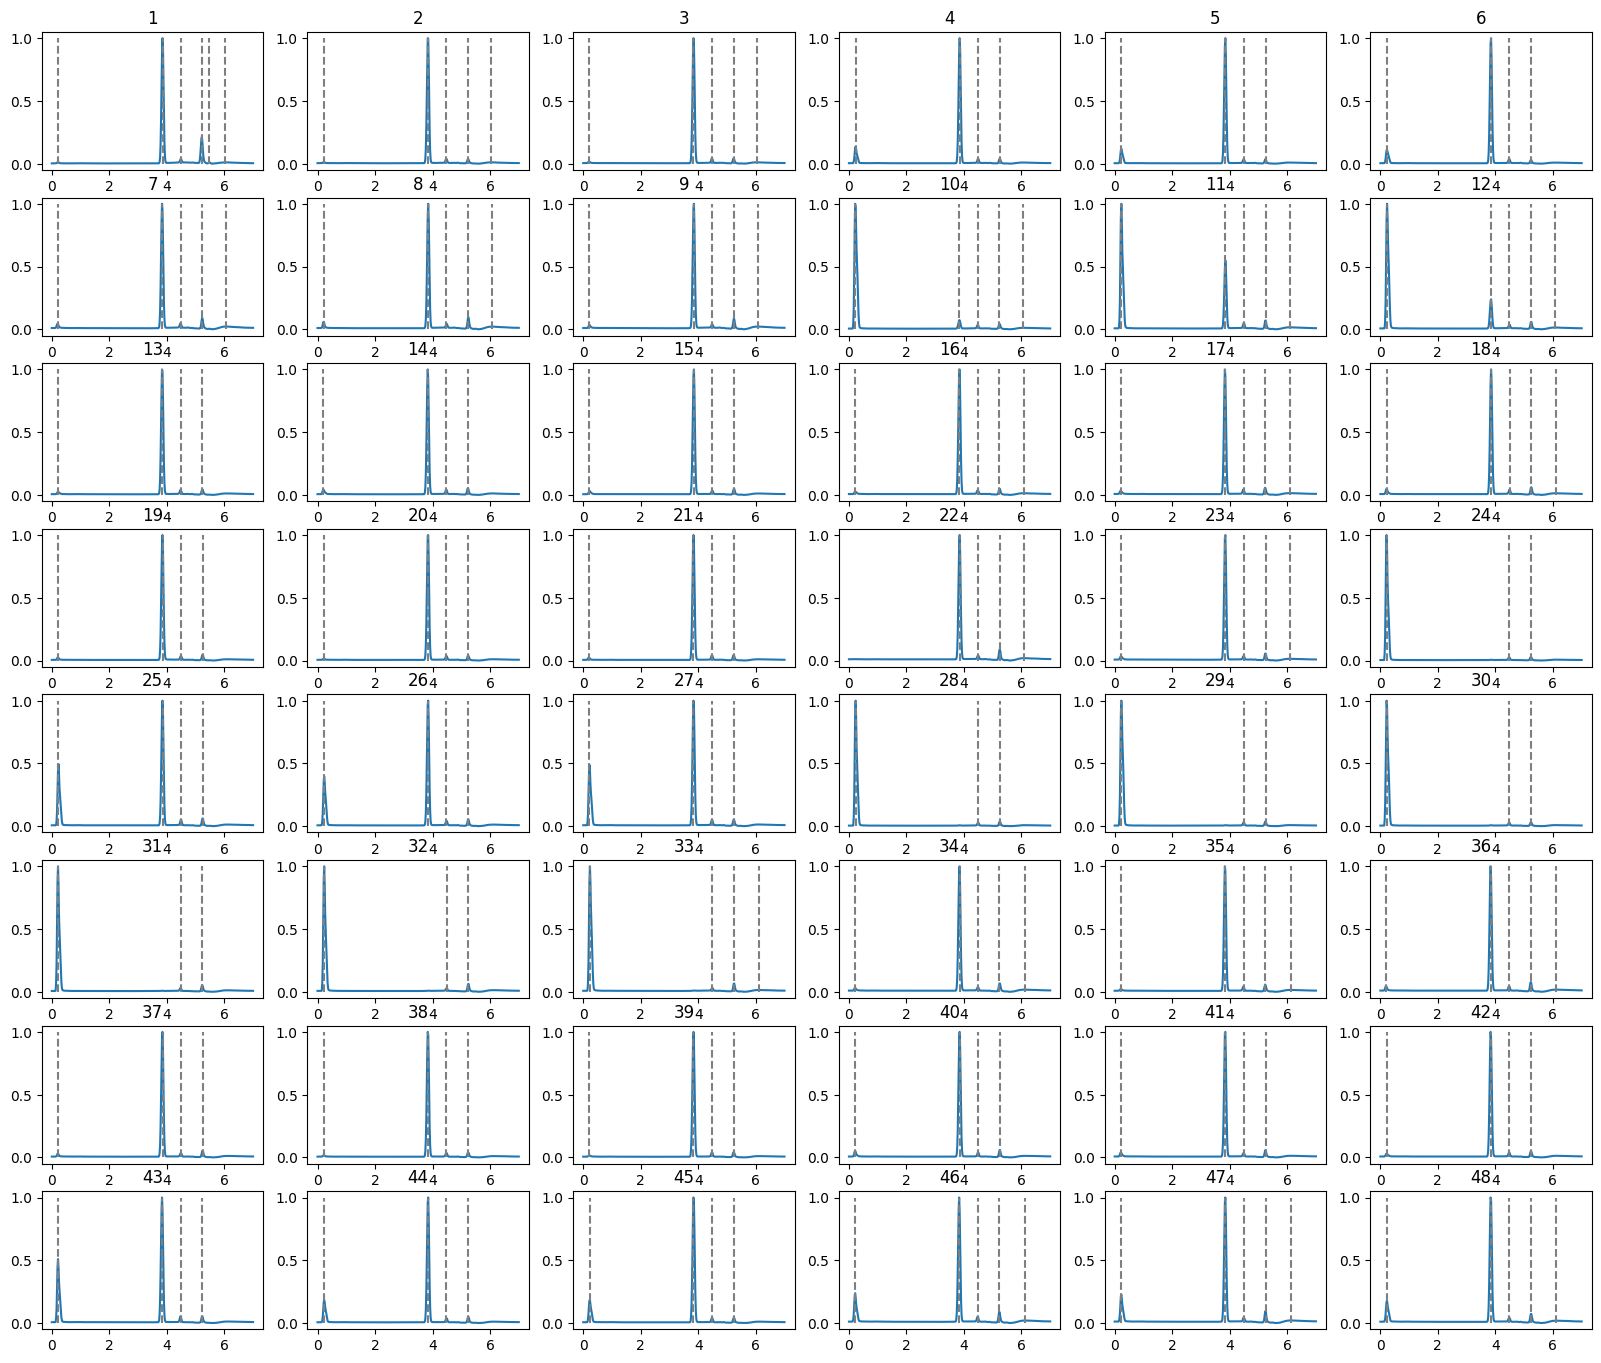

In [9]:
#plot the normalized spectra
fig = plt.figure(figsize=(20,19))
#Spectra vs Weights
for i in range(len(df_list)):
  plt.subplot(1+len(df_list)//6,6,i+1)
  plot_spec(i)

In [10]:
# Normalized dataframe
# Define a function for Min-Max normalization
# def min_max_normalize(column):
#     min_val = column.min()
#     max_val = column.max()
#     normalized_column = (column - min_val) / (max_val - min_val)
#     return normalized_column

# Apply Min-Max normalization to each column
# normalized_df = big_df.apply(min_max_normalize)

# normalized_df


In [11]:
import scipy.signal
all_peak = np.zeros([big_df.shape[1]//2,6])
all_peak_x = np.zeros([big_df.shape[1]//2,6])
prod_peak = np.zeros(big_df.shape[1]//2)
react_peak = np.zeros(big_df.shape[1]//2)
acid_peak = np.zeros(big_df.shape[1]//2)


for i in range(big_df.shape[1]//2):
    # Create a normalized signal
    x = big_df['X%s'%columns_list[i]]
    y = big_df['Y%s'%columns_list[i]]
    #signal_norm = (df['signal'] - df['signal'].min()) / (df['signal'].max() - df['signal'].min())
    #norm_y = (big_df['Y%s'%sorted_files[i]] - big_df['Y%s'%sorted_files[i]].min()) / (big_df['Y%s'%sorted_files[i]].max() - big_df['Y%s'%sorted_files[i]].min())

    # Find peaks with a low prominence filter of 0.01
    #peak_locations, _ = scipy.signal.find_peaks(y, prominence=0.001)
    peak_locations, _ = scipy.signal.find_peaks(y, prominence=0.01)
    for j, peak in enumerate(peak_locations):
        #print(peak_locations.shape)
        all_peak[i,j] = y[peak]
        all_peak_x[i,j] = x[peak]

        if x[peak] > 0.0 and x[peak] < 0.5:
            prod_peak[i] = y[peak]

        elif x[peak] > 3.0 and x[peak] < 4.5:
            react_peak[i]  = y[peak]

        elif x[peak] > 5 and x[peak] < 5.5:
            acid_peak[i] = y[peak]
        else: 
            None

ratio_peak = np.nan_to_num(react_peak/prod_peak)
acid_peak,ratio_peak 

(array([0.21190114, 0.0364686 , 0.04220769, 0.03915923, 0.03405116,
        0.02956366, 0.08893128, 0.09555162, 0.08215957, 0.04266696,
        0.07079783, 0.05951502, 0.04405822, 0.05400985, 0.04915999,
        0.04989381, 0.05730587, 0.06163324, 0.0459797 , 0.03891912,
        0.04392808, 0.08928683, 0.05570981, 0.02849593, 0.06181421,
        0.05293597, 0.05203297, 0.03684841, 0.03725463, 0.03184085,
        0.05250786, 0.06276415, 0.06633625, 0.06624928, 0.05752918,
        0.07749732, 0.05397649, 0.04017334, 0.04257804, 0.05975559,
        0.05814748, 0.049513  , 0.05400109, 0.04958636, 0.04206535,
        0.08828042, 0.09464318, 0.07299631]),
 array([2.82876266e+000, 1.79769313e+308, 2.43347911e+000, 7.38568776e+000,
        2.95451802e-001, 3.37854044e-001, 1.09230778e+000, 7.13590188e-001,
        1.18288222e+000, 3.44876745e-002, 5.48766390e-001, 3.74258378e-002,
        1.65918242e+000, 9.94798324e-001, 1.10529608e+000, 1.44687502e+000,
        1.34639672e+000, 2.06362885e+0

In [12]:
# for data_size in range(big_df.shape[1]//2):
#     norm_y = (big_df['Y%s'%columns_list[data_size]] - big_df['Y%s'%columns_list[data_size]].min()) / (big_df['Y%s'%columns_list[data_size]].max() - big_df['Y%s'%columns_list[data_size]].min())

# Find peaks with a low prominence filter of 0.01
peak_locations, _ = scipy.signal.find_peaks(y, prominence=0.01)
for i in peak_locations:
    if x[i] > 0.2 and x[i] < 0.4:
        print(x[i],y[i])
    elif x[i] > 3.0 and x[i] < 4.5:
        print(x[i],y[i])
    elif x[i] > 5 and x[i] < 5.5:
        print(x[i],y[i])
    else: 
        print('other', x[i],y[i])


    

0.2333333 0.17423429955115916
3.833333 1.0
4.483333 0.04318277183597001
5.233333 0.07299630737980742


[<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='X102119_18', ylabel='Y102119_18'>]

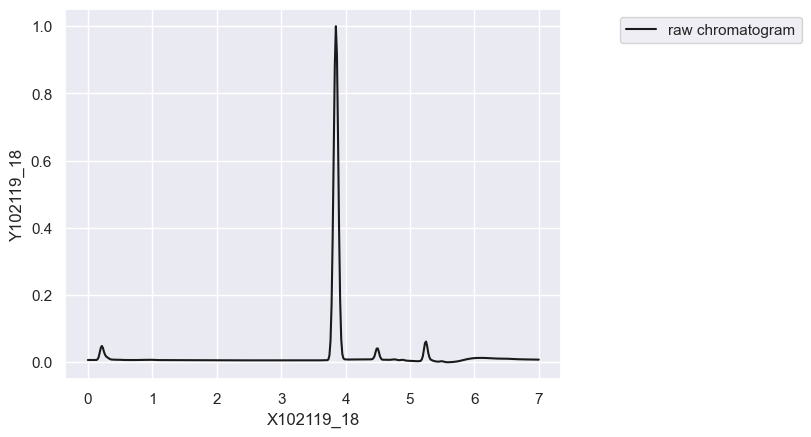

In [13]:
# Chromatogram(big_df, cols={'time':'X%s'%sorted_files[1], 'signal':'Y%s'%sorted_files[1]}).show()
# Chromatogram(big_df, cols={'time':'X%s'%sorted_files[16], 'signal':'Y%s'%sorted_files[1]}).show()
Chromatogram(big_df, cols={'time':'X%s'%columns_list[17], 'signal':'Y%s'%columns_list[17]}).show()
# Chromatogram(big_df, cols={'time':'X%s'%sorted_files[31], 'signal':'Y%s'%sorted_files[31]}).show()

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 24.55it/s]


,retention_time,scale,skew,amplitude,area,peak_id
0,3.8,0.040016,0.387259,0.099924,5.995438,1
0,4.3,0.292226,1.868745,0.008460,0.507596,2
0,5.2,0.051504,1.368466,0.021056,1.263381,3


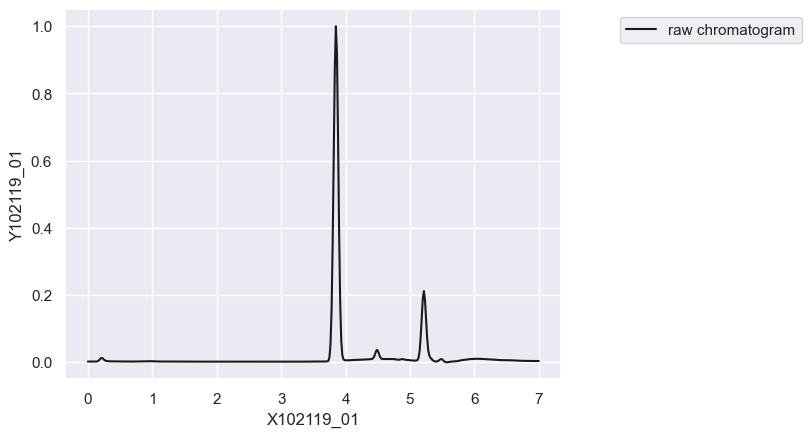

In [14]:
peak_prod = Chromatogram(big_df, cols={'time':'X%s'%columns_list[0], 'signal':'Y%s'%columns_list[0]})
#Chromatogram(big_df, cols={'time':'X%s'%sorted_files[31], 'signal':'Y%s'%sorted_files[31]}).fit_peaks()
#peaks_react = Chromatogram(big_df, cols={'time':'X102107_EXP Mix.csv', 'signal':'Y102107_EXP Mix.csv'},time_window=[3,4.5]).fit_peaks(prominence=0.0)['area']#<- this worked...
#peak_prod.fit_peaks()
peak_prod.show()
peak_prod.fit_peaks(prominence=0.012)

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 31.80it/s]


,retention_time,scale,skew,amplitude,area,peak_id
0,3.9,0.043846,-0.760024,0.099733,5.983979,1
0,4.3,0.264411,1.469404,0.007888,0.473268,2
0,5.2,0.058704,2.091877,0.005556,0.333376,3


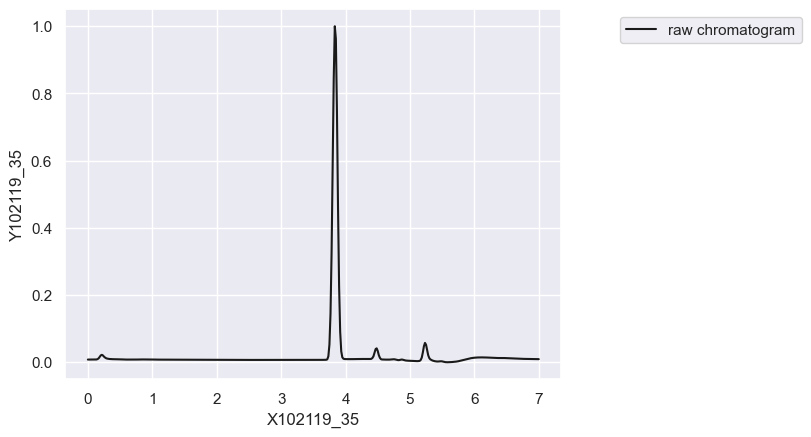

In [15]:
peak_prod = Chromatogram(big_df, cols={'time':'X%s'%columns_list[34], 'signal':'Y%s'%columns_list[34]})
#Chromatogram(big_df, cols={'time':'X%s'%sorted_files[31], 'signal':'Y%s'%sorted_files[31]}).fit_peaks()
#peaks_react = Chromatogram(big_df, cols={'time':'X102107_EXP Mix.csv', 'signal':'Y102107_EXP Mix.csv'},time_window=[3,4.5]).fit_peaks(prominence=0.0)['area']#<- this worked...
#peak_prod.fit_peaks()
#peak_prod.crop([0.1,0.4])
peak_prod.show()
peak_prod.fit_peaks(prominence=0.03)

In [16]:
def fit_peak_range(min, max,filter):
    peak_list = []
    for i in range(big_df.shape[1]//2):
        #print(i)
        #signal_norm = (big_df['Y%s'%sorted_files[i]] - big_df['Y%s'%sorted_files[i]].min()) / (big_df['Y%s'%sorted_files[i]].max() - big_df['Y%s'%sorted_files[i]].min())
        chrom = Chromatogram(big_df, cols={'time':'X%s'%columns_list[i], 'signal':'Y%s'%columns_list[i]},time_window=[min,max])
        chrom.correct_baseline()
        #print(i)
        peak_list.append(chrom.fit_peaks(prominence=filter))
        # if i ==21:
        #     peak_list.append(chrom.fit_peaks(prominence=filter))
        # # elif i  == 31:
        # #     peak_list.append(chrom.fit_peaks(prominence=0.06))
        # else: 
        #     peak_list.append(chrom.fit_peaks())
    return peak_list

In [17]:
list_all = fit_peak_range(0, 7, 0.02)
list_all

Deconvolving mixture:   0%|          | 0/1 [00:00<?, ?it/s]

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]


[   retention_time     scale      skew  amplitude      area  peak_id
 0             3.8  0.040016  0.387259   0.099924  5.995438        1
 0             4.3  0.292226  1.868745   0.008460  0.507596        2
 0             5.2  0.051504  1.368466   0.021056  1.263381        3,
    retention_time     scale      skew  amplitude      area  peak_id
 0             3.9  0.042479 -0.690897   0.099867  5.992043        1
 0             4.5  0.062275 -1.958294   0.003782  0.226922        2
 0             5.2  0.056921  1.835004   0.003520  0.211218        3,
    retention_time     scale      skew  amplitude      area  peak_id
 0             3.9  0.043709 -0.753845   0.099856  5.991334        1
 0             4.5  0.060535 -1.976014   0.004062  0.243749        2
 0             5.2  0.056441  1.886699   0.004089  0.245346        3,
    retention_time     scale      skew  amplitude      area  peak_id
 0             0.2  0.068902  3.410302   0.013157  0.789399        1
 0             3.9  0.044248 -0

In [18]:
list_product = fit_peak_range(0, 0.5, 0.05)

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 114.41it/s]


In [19]:
list_reactant = fit_peak_range(3.5, 4, 0.2)

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 53.45it/s]


In [20]:
def select_peaks_area(value,peak_list):
    array = np.zeros(len(peak_list))
    for i in range(len(peak_list)):
        if (peak_list[i]['retention_time'] == value).any() == True:
            indices = np.where(peak_list[i] == value)
            array[i] = peak_list[i]['area'].iloc[indices[0].item()]
        else:
            array[i] = 0
    return array

#acid_peak = select_peaks_area(5.2)[3:]
product_area = select_peaks_area(0.2,list_product)
acid_area = select_peaks_area(5.2,list_all)
reactant_area = select_peaks_area(3.9,list_reactant)+select_peaks_area(3.8,list_reactant)
unknown_area = select_peaks_area(4.3,list_all)+select_peaks_area(4.5,list_all)+select_peaks_area(4.4,list_all)+select_peaks_area(4.8,list_all)+select_peaks_area(4.9,list_all)+select_peaks_area(4.6,list_all)

In [21]:
time = np.array([element for element in  df_summary['Sample Time (min)']])
temp = np.array([element for element in  df_summary['Temperature (degC)']])
sulfinating_agent= np.array([element for element in  df_summary['Sulfonating Agent\n(wt%)']])
analyte = np.array([element for element in  df_summary['Reagent Ratio\n(mg/mL reagent/sulfonating agent)']])
model_id = np.array([element for element in  df_summary['Model Design ID']])
vial_id = np.array([element for element in  df_summary['Vial ID']])

In [22]:
time = np.array([element for element in  df_summary['Sample Time (min)']])
time = np.hstack([time[:21],time[24:]])
temp = np.array([element for element in  df_summary['Temperature (degC)']])
temp = np.hstack([temp[:21],temp[24:]])

sulfinating_agent= np.array([element for element in  df_summary['Sulfonating Agent\n(wt%)']])
sulfinating_agent= np.hstack([sulfinating_agent[:21],sulfinating_agent[24:]])

analyte = np.array([element for element in  df_summary['Reagent Ratio\n(mg/mL reagent/sulfonating agent)']])
analyte= np.hstack([analyte[:21],analyte[24:]])


In [23]:
product = np.hstack([product_area[:21],product_area[24:]])
reactant = np.hstack([reactant_area[:21],reactant_area[24:]])
unknown = np.hstack([unknown_area[:21],unknown_area[24:]])

ratio = product/reactant


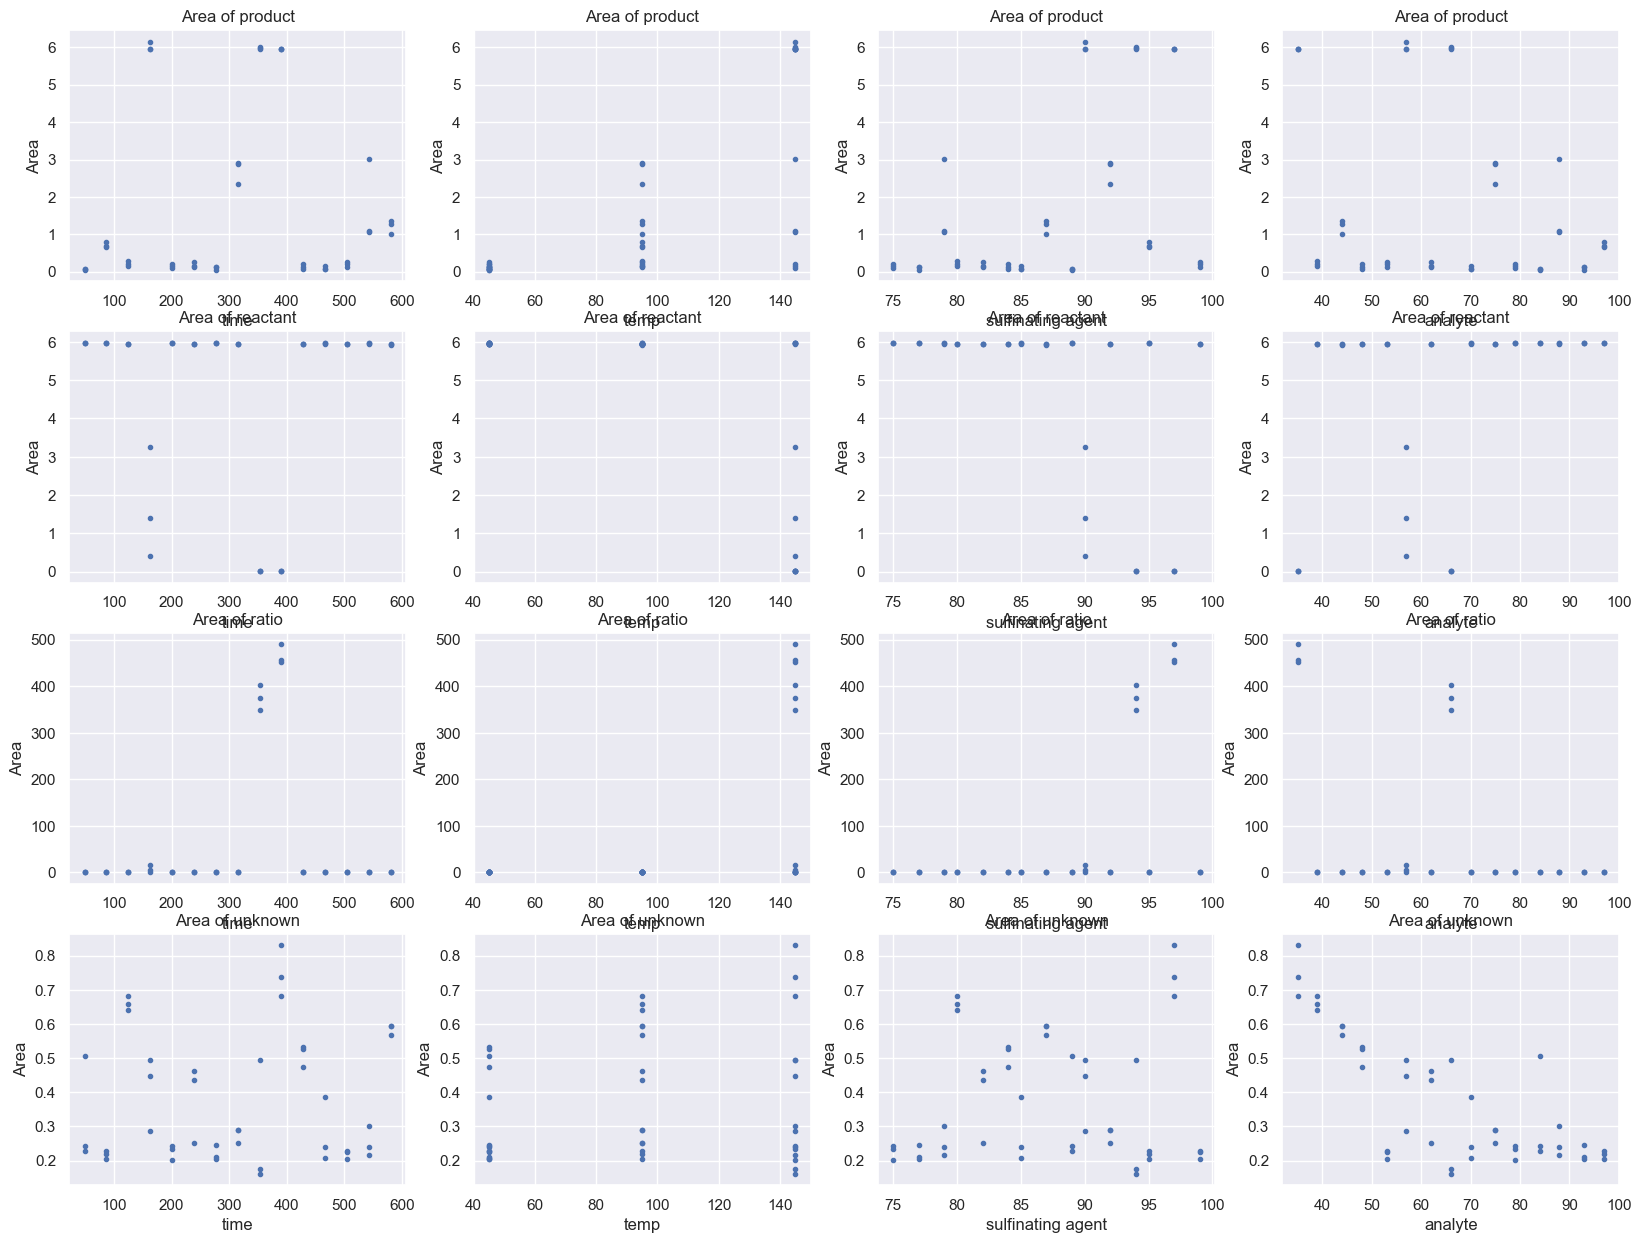

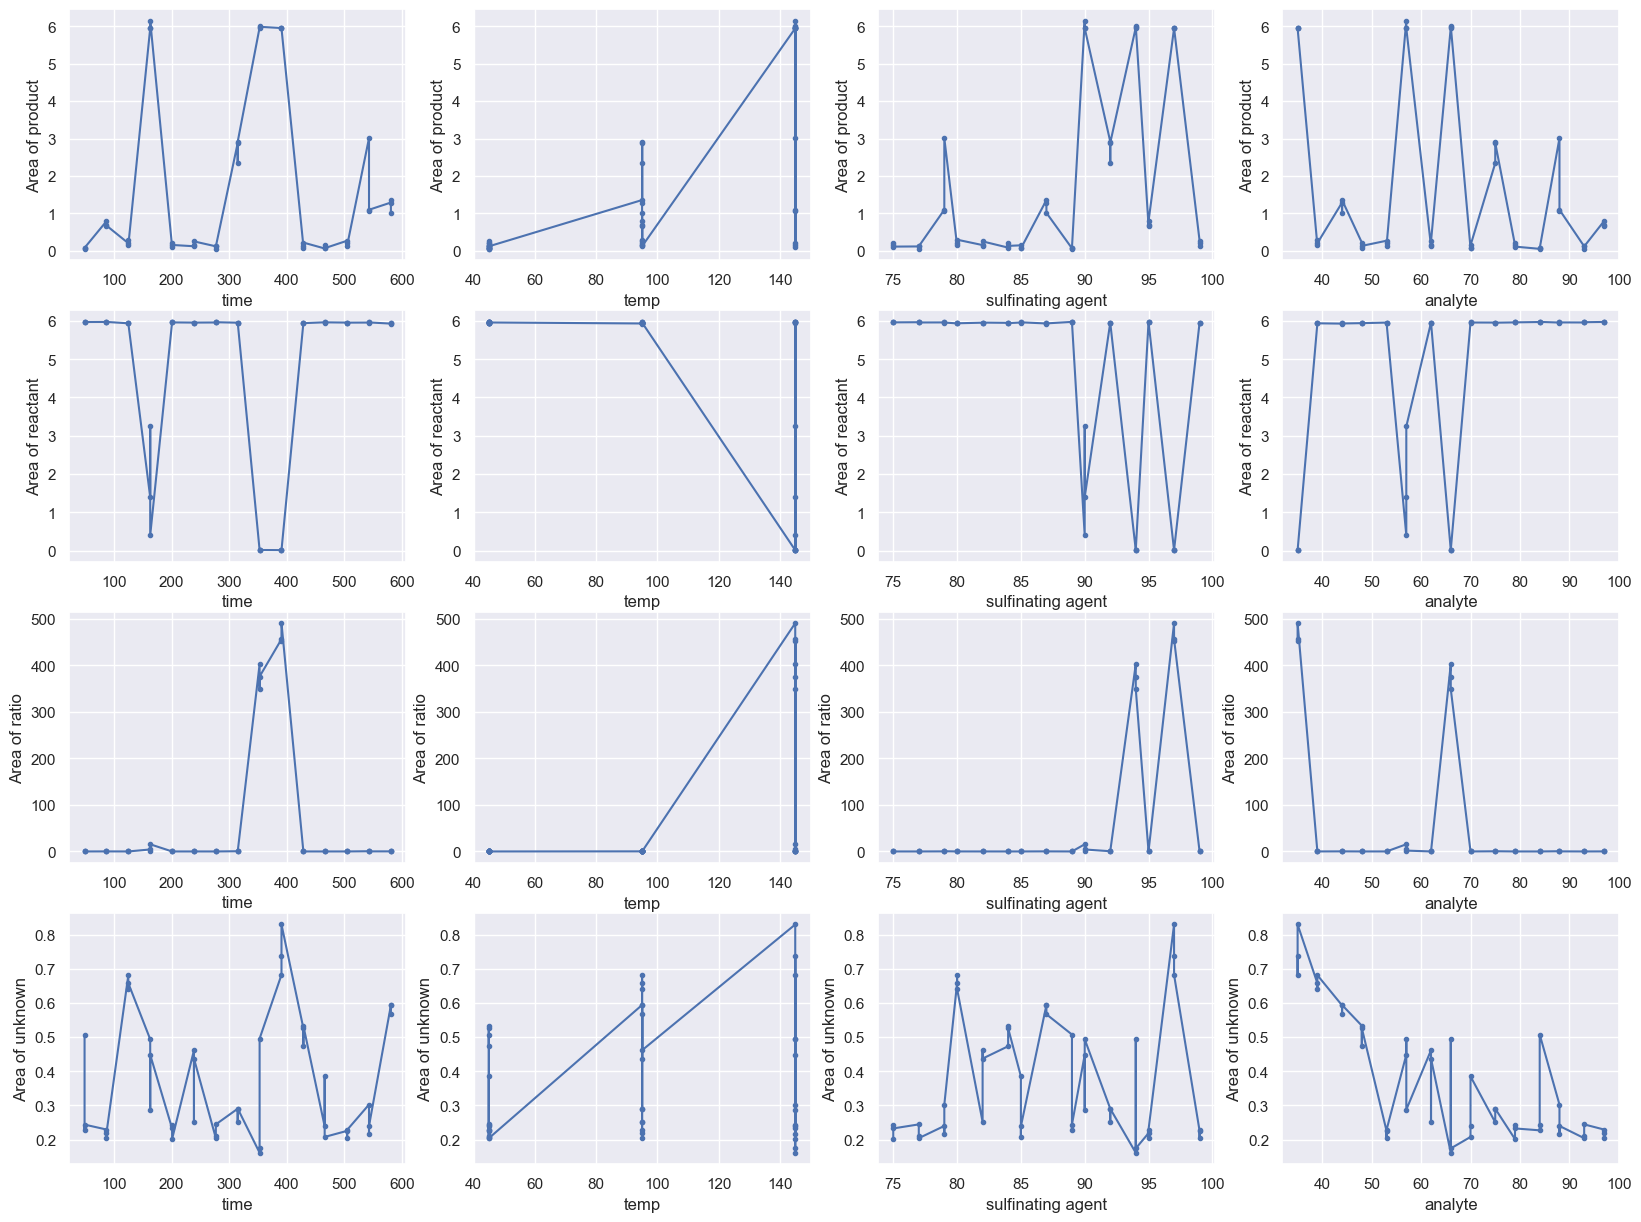

In [24]:
# time = np.array([element for element in  df_summary['Sample Time (min)']])[:48]
# temp = np.array([element for element in  df_summary['Temperature (degC)']])[:48]
# sulfinating_agent= np.array([element for element in  df_summary['Sulfonating Agent\n(wt%)']])[:48]
# analyte = np.array([element for element in  df_summary['Reagent Ratio\n(mg/mL reagent/sulfonating agent)']])[:48]
# time_52.sort()
# time_02.sort()
label_x= ['time','temp','sulfinating agent','analyte']
x_data = [time,temp,sulfinating_agent,analyte]
y_data = [product,reactant,product/reactant,unknown]

label_y = ['product','reactant','ratio','unknown']
count = 0

fig = plt.figure(figsize=(20,15))
for i in range(len(y_data)):
    for j in range(len(x_data)):
        count +=1
        plt.subplot(len(y_data),len(x_data),count)
        plt.plot(x_data[j],y_data[i],'.')
        plt.title('Area of %s'%label_y[i])
        plt.ylabel('Area')
        plt.xlabel('%s'%(label_x[j]))

count = 0
fig = plt.figure(figsize=(20,15))
for i in range(len(y_data)):
    for j in range(len(x_data)):
        count +=1
        pair = np.array([x_data[j],y_data[i]]).transpose()
        pair = pair[pair[:,0].argsort()]
        plt.subplot(len(y_data),len(x_data),count)
        #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
        #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
        #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).max(axis=1)[1:],'.-')
        plt.plot(pair[:,0],pair[:,1],'.-')
        plt.xlabel(label_x[j])
        plt.ylabel('Area of %s'%label_y[i])

#pair[pair[:,0].argsort()]

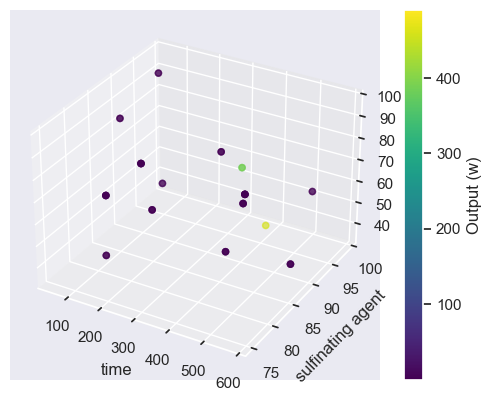

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample da
x = time
y = sulfinating_agent
z = analyte
w = ratio # Example relationship

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=w, cmap='viridis')
plt.colorbar(sc, label='Output (w)')
ax.set_xlabel('time')
ax.set_ylabel('sulfinating agent')
ax.set_zlabel('analyte')

plt.show()

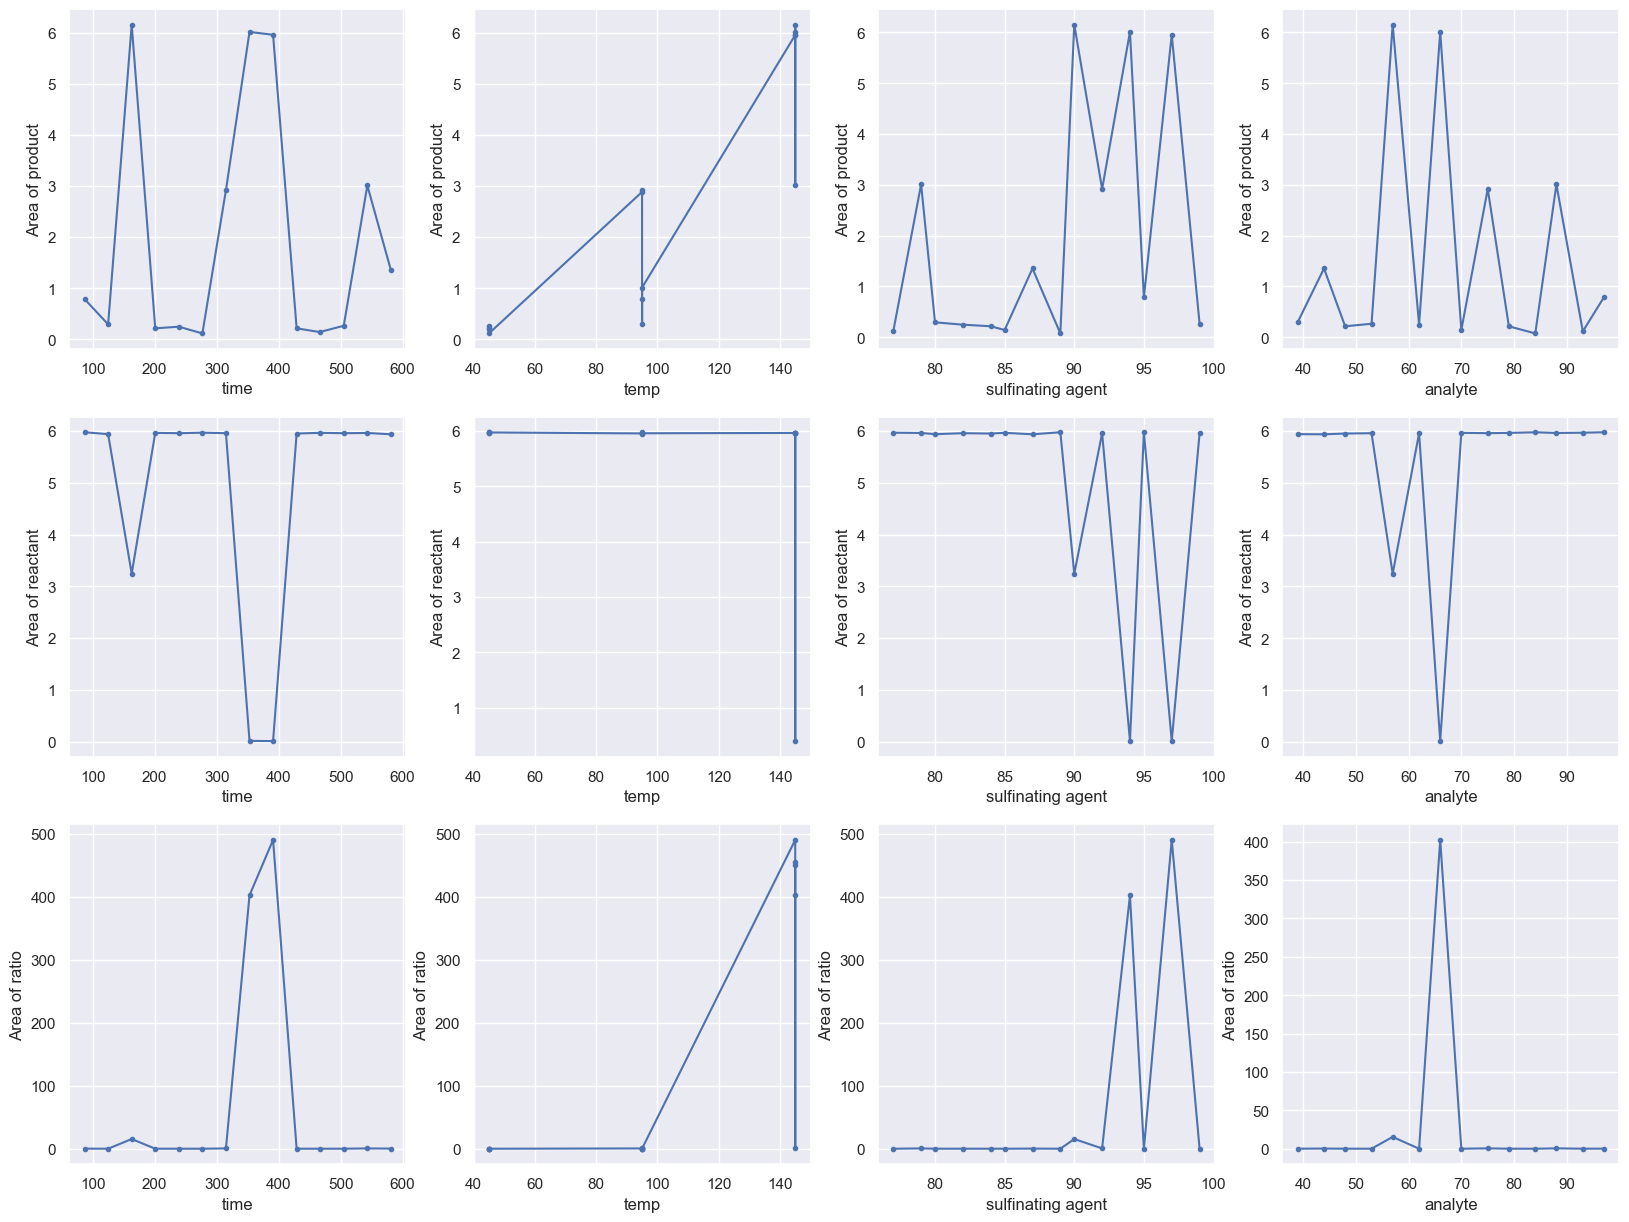

In [26]:
label_x= ['time','temp','sulfinating agent','analyte']
x_data = [time,temp,sulfinating_agent,analyte]
y_data = [product,reactant,product/reactant,]

label_y = ['product','reactant','ratio']
# count = 0

count = 0
fig = plt.figure(figsize=(20,15))
for i in range(len(y_data)):
    for j in range(len(x_data)):
        count +=1
        pair = np.array([x_data[j],y_data[i]]).transpose()
        pair = pair[pair[:,0].argsort()]
        plt.subplot(len(y_data),len(x_data),count)
        #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
        #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
        plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).max(axis=1)[1:],'.-')
        plt.xlabel(label_x[j])
        plt.ylabel('Area of %s'%label_y[i])


#pair[pair[:,0].argsort()]

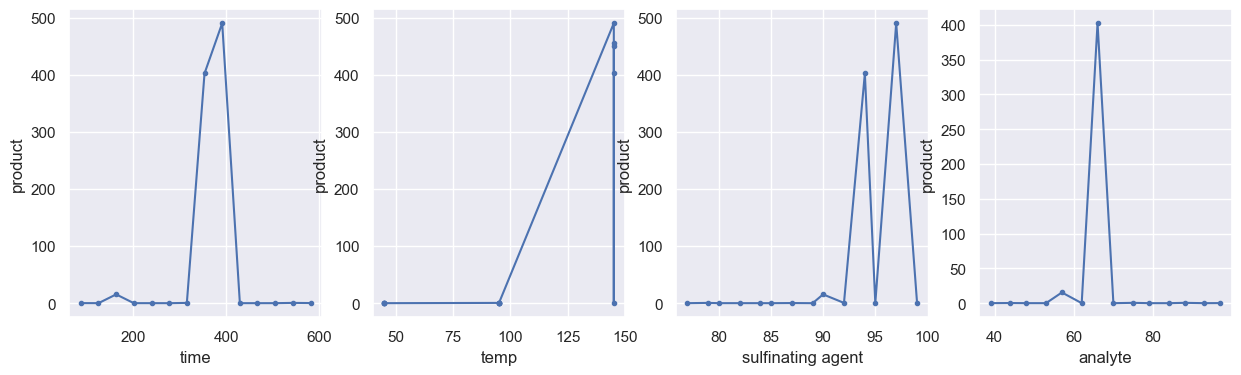

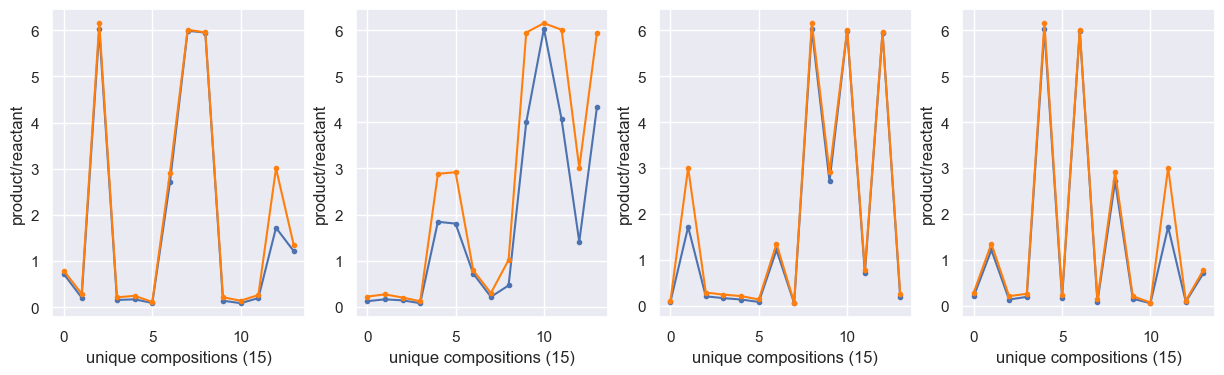

In [27]:
fig = plt.figure(figsize=(15,4))
for j in range(4):
    pair = np.array([x_data[j],product/reactant]).transpose()
    pair = pair[pair[:,0].argsort()]
    plt.subplot(1,len(x_data),j+1)
    #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
    #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
    plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).max(axis=1)[1:],'.-')
    plt.xlabel(label_x[j])
    plt.ylabel('product')


plt.show()
fig = plt.figure(figsize=(15,4))
for j in range(4):
    pair = np.array([x_data[j],product]).transpose()
    pair = pair[pair[:,0].argsort()]
    plt.subplot(1,len(x_data),j+1)
    #plt.plot(x_data[j].reshape(-1,3).mean(axis=1),area.reshape(-1,3).mean(axis=1),'.-')
    #plt.plot(pair[:,0].reshape(-1,3).mean(axis=1)[1:],pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
    plt.plot(pair[:,1].reshape(-1,3).mean(axis=1)[1:],'.-')
    plt.plot(pair[:,1].reshape(-1,3).max(axis=1)[1:],'.-',color='tab:orange')
    plt.xlabel('unique compositions (15)')
    plt.ylabel('product/reactant')

In [28]:
np.array([ratio,analyte])

array([[1.06155720e-02, 8.19287026e-03, 1.26804380e-02, 1.31836120e-01,
        1.15701620e-01, 1.12473925e-01, 3.36093873e-02, 4.95051376e-02,
        2.38299230e-02, 1.54103447e+01, 1.83313232e+00, 4.26849898e+00,
        1.82351134e-02, 3.62251741e-02, 2.56879334e-02, 1.98501891e-02,
        2.50927738e-02, 4.16759401e-02, 1.95175187e-02, 8.94329039e-03,
        1.90285937e-02, 4.89944244e-01, 3.92726875e-01, 4.84249682e-01,
        4.02292856e+02, 3.48868790e+02, 3.75781715e+02, 4.55963318e+02,
        4.51078456e+02, 4.90310742e+02, 2.15573705e-02, 1.37839530e-02,
        3.64690254e-02, 2.40075186e-02, 1.10632401e-02, 9.87897279e-03,
        4.46756921e-02, 3.30787296e-02, 2.25866246e-02, 5.05147727e-01,
        1.78209267e-01, 1.83526171e-01, 2.28262214e-01, 2.17153198e-01,
        1.70520401e-01],
       [8.40000000e+01, 8.40000000e+01, 8.40000000e+01, 9.70000000e+01,
        9.70000000e+01, 9.70000000e+01, 3.90000000e+01, 3.90000000e+01,
        3.90000000e+01, 5.70000000e+01,

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create data
x = time
y = sulfinating_agent
x, y = np.meshgrid(x, y)
z = ratio

# Plot
fig = plt.figure()
# Plot a basic wireframe.
ax.plot_wireframe(x, y, z, rstride=10, cstride=10)

plt.show()

ax.set_xlabel('Input X')
ax.set_ylabel('Input Y')
ax.set_zlabel('Output Z')

plt.show()


ValueError: Argument Z must be 2-dimensional.

<Figure size 640x480 with 0 Axes>

# NOTE
Product = 0.29 min RT

Reactant = 3.92 min RT

Sulfuric Acid = 5.25 min RT

All other peaks are potential side products
Area counts for compounds can assume intersection at origin and 8910360 = 0.053 g/ml
